In [3]:
import pandas as pd
from scipy import stats
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

import networkx as nx

In [5]:
FULL_DF = pd.read_csv('full_data_clean.csv', delimiter = ',')
FULL_DF = FULL_DF.drop(FULL_DF.columns[0], axis=1)

In [6]:
FULL_DF.shape

(19874, 9)

In [7]:
FULL_DF.head()

,post_id,url,title,ups,downs,score,author,time,num_comments
0,1u57ld,http://www.nytimes.com/2014/01/01/world/middle...,Egypt Says 3 Journalists Will Be Held 15 More ...,98,0,98,wndrgls,2014-01-01,6
1,1u5hdf,http://www.nydailynews.com/news/world/saudi-pr...,Saudi royal faces death penalty for murder of ...,128,0,128,davidreiss666,2014-01-01,33
2,1u5jw2,http://www.theguardian.com/world/2013/dec/31/e...,Elephant deaths rise in Tanzania after shoot-t...,800,0,800,anutensil,2014-01-01,91
3,1u5k9u,http://www.theglobeandmail.com/news/politics/c...,"Canada is headed in the wrong direction, major...",1423,0,1423,MoonMetropolis,2014-01-01,445
4,1u5low,http://m.bbc.co.uk/news/world-europe-25567096,Latvia enters Eurozone and becomes the 18th st...,1783,0,1783,maxbrggs,2014-01-01,395


In [8]:
FULL_DF.post_id.nunique()

19874

In [9]:
# load text data

In [10]:
TEXT = pd.read_csv('text_data.csv')

In [14]:
TEXT = TEXT.drop(TEXT.columns[0], axis=1)

In [15]:
TEXT.shape

(19874, 20)

In [16]:
TEXT.columns = ['word_count', 'avg_wordlen', 'diversity', 'sent_count', 'avg_sentl', 'v_tag', 'a_tag', 'topic_1', 
                'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 
                'text_sentiment', 'title_sentiment', 'title_len']

In [17]:
TEXT.head()

,word_count,avg_wordlen,diversity,sent_count,avg_sentl,v_tag,a_tag,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,text_sentiment,title_sentiment,title_len
0,195,4.456410,0.600000,8,24.375000,0.133333,0.030769,0.000000,0.00000,0.000000,0.000000,0.306768,0.000000,0.230926,0.455087,0.000000,0.0,0.6124,0.0000,26
1,477,4.352201,0.534591,15,31.800000,0.132075,0.083857,0.725907,0.00000,0.000000,0.000000,0.095279,0.075210,0.000000,0.099708,0.000000,0.0,0.8750,0.0000,32
2,440,4.165909,0.436364,11,40.000000,0.188636,0.104545,0.000000,0.00000,0.000000,0.473956,0.268158,0.000000,0.000000,0.000000,0.245789,0.0,-0.5013,-0.0382,13
3,42,5.000000,0.809524,3,14.000000,0.214286,0.071429,0.000000,0.00000,0.000000,0.000000,0.000000,0.954986,0.000000,0.000000,0.000000,0.0,0.2500,0.0000,13
4,243,5.053498,0.551440,7,34.714286,0.156379,0.078189,0.000000,0.02821,0.363753,0.503527,0.000000,0.098954,0.000000,0.000000,0.000000,0.0,-0.9900,0.0000,10


In [18]:
TEXT['post_id'] = FULL_DF.post_id

In [19]:
TEXT.head()

,word_count,avg_wordlen,diversity,sent_count,avg_sentl,v_tag,a_tag,topic_1,topic_2,topic_3,...,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,text_sentiment,title_sentiment,title_len,post_id
0,195,4.456410,0.600000,8,24.375000,0.133333,0.030769,0.000000,0.00000,0.000000,...,0.306768,0.000000,0.230926,0.455087,0.000000,0.0,0.6124,0.0000,26,1u57ld
1,477,4.352201,0.534591,15,31.800000,0.132075,0.083857,0.725907,0.00000,0.000000,...,0.095279,0.075210,0.000000,0.099708,0.000000,0.0,0.8750,0.0000,32,1u5hdf
2,440,4.165909,0.436364,11,40.000000,0.188636,0.104545,0.000000,0.00000,0.000000,...,0.268158,0.000000,0.000000,0.000000,0.245789,0.0,-0.5013,-0.0382,13,1u5jw2
3,42,5.000000,0.809524,3,14.000000,0.214286,0.071429,0.000000,0.00000,0.000000,...,0.000000,0.954986,0.000000,0.000000,0.000000,0.0,0.2500,0.0000,13,1u5k9u
4,243,5.053498,0.551440,7,34.714286,0.156379,0.078189,0.000000,0.02821,0.363753,...,0.000000,0.098954,0.000000,0.000000,0.000000,0.0,-0.9900,0.0000,10,1u5low


In [21]:
COMMENT = pd.read_csv('comment_data.csv', delimiter = ',')
COMMENT = COMMENT.drop(COMMENT.columns[0], axis=1)

/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
COMMENT.shape

(19869, 33)

In [23]:
COMMENT.columns

Index(['post_id', 'perc_miss_comment_author', 'total_num_nodes',
       'total_density', 'num_weak_component', 'num_strong_component',
       'main_miss_node', 'main_num_nodes', 'main_density', 'main_transitivity',
       'main_avg_shortest_path', 'main_diameter', 'main_radius',
       'main_eccentricity_mean', 'main_eccentrisity_std',
       'avg_periphery_lkarma', 'avg_periphery_ckarma', 'avg_center_lkarma',
       'avg_center_ckarma', 'in_degree_top_avg_lkarma',
       'in_degree_top_avg_ckarma', 'out_degree_top_avg_lkarma',
       'out_degree_top_avg_ckarma', 'close_top_avg_lkarma',
       'close_top_avg_ckarma', 'between_top_avg_lkarma',
       'between_top_avg_ckarma', 'hub_top_avg_lkarma', 'hub_top_avg_ckarma',
       'auth_top_avg_lkarma', 'auth_top_avg_ckarma', 'author_lkarma',
       'author_ckarma'],
      dtype='object')

In [24]:
COMMENT.head()

,post_id,perc_miss_comment_author,total_num_nodes,total_density,num_weak_component,num_strong_component,main_miss_node,main_num_nodes,main_density,main_transitivity,...,close_top_avg_lkarma,close_top_avg_ckarma,between_top_avg_lkarma,between_top_avg_ckarma,hub_top_avg_lkarma,hub_top_avg_ckarma,auth_top_avg_lkarma,auth_top_avg_ckarma,author_lkarma,author_ckarma
0,1u57ld,0.333333,4,0.166667,2,4,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1u5hdf,0.171429,19,0.061404,2,16,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1u5jw2,0.156250,37,0.038288,1,27,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1u5k9u,0.347926,133,0.009228,4,118,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1u5low,0.234300,182,0.007073,7,146,0.153846,13.0,0.147436,0.0,...,10819.0,35979.0,9755.0,6594.0,1272.0,242149.0,10819.0,35979.0,2016,572


In [25]:
COMMENT.post_id.nunique()

19869

In [26]:
# combine data

In [27]:
Y = FULL_DF[['post_id', 'score','author', 'time', 'num_comments']]

In [28]:
ALL_1 = Y.merge(TEXT, on='post_id', how='left')

In [29]:
ALL_1.shape

(19874, 25)

In [30]:
ALL_1.columns

Index(['post_id', 'score', 'author', 'time', 'num_comments', 'word_count',
       'avg_wordlen', 'diversity', 'sent_count', 'avg_sentl', 'v_tag', 'a_tag',
       'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'text_sentiment',
       'title_sentiment', 'title_len'],
      dtype='object')

In [31]:
ALL = ALL_1.merge(COMMENT, on='post_id', how='right')

In [32]:
ALL.shape

(19869, 57)

In [39]:
ALL.columns

Index(['post_id', 'score', 'author', 'time', 'num_comments', 'word_count',
       'avg_wordlen', 'diversity', 'sent_count', 'avg_sentl', 'v_tag', 'a_tag',
       'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'text_sentiment',
       'title_sentiment', 'title_len', 'perc_miss_comment_author',
       'total_num_nodes', 'total_density', 'num_weak_component',
       'num_strong_component', 'main_miss_node', 'main_num_nodes',
       'main_density', 'main_transitivity', 'main_avg_shortest_path',
       'main_diameter', 'main_radius', 'main_eccentricity_mean',
       'main_eccentrisity_std', 'avg_periphery_lkarma', 'avg_periphery_ckarma',
       'avg_center_lkarma', 'avg_center_ckarma', 'in_degree_top_avg_lkarma',
       'in_degree_top_avg_ckarma', 'out_degree_top_avg_lkarma',
       'out_degree_top_avg_ckarma', 'close_top_avg_lkarma',
       'close_top_avg_ckarma', 'between_top_avg_lkarma',
       'between_top_avg_ckarma

In [84]:
# remember some posts / comments have missing information
x_col = ['word_count',
       'avg_wordlen', 'diversity', 'sent_count', 'avg_sentl', 'v_tag', 'a_tag',
       'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'text_sentiment',
       'title_sentiment', 'title_len', 
       'total_num_nodes', 'total_density', 'num_weak_component',
       'num_strong_component', 'main_num_nodes',
       'main_density', 'main_transitivity', 'main_avg_shortest_path',
       'main_diameter', 'main_radius', 'main_eccentricity_mean',
       'main_eccentrisity_std', 'avg_periphery_lkarma', 'avg_periphery_ckarma',
       'avg_center_lkarma', 'avg_center_ckarma', 'in_degree_top_avg_lkarma',
       'in_degree_top_avg_ckarma', 'out_degree_top_avg_lkarma',
       'out_degree_top_avg_ckarma', 'close_top_avg_lkarma',
       'close_top_avg_ckarma', 'between_top_avg_lkarma',
       'between_top_avg_ckarma', 'hub_top_avg_lkarma', 'hub_top_avg_ckarma',
       'auth_top_avg_lkarma', 'auth_top_avg_ckarma', 'author_lkarma',
       'author_ckarma']

In [179]:
TEXT.text_sentiment.min()

-1.0

In [ ]:
# distribution

In [34]:
ALL['month'] = ALL['time'].apply(lambda x: x[:-3])
date1 = "2014-01-01"  # input start date
date2 = "2015-12-31"  # input end date

month_list = [i.strftime('%Y-%m') for i in pd.date_range(start=date1, end=date2, freq='MS')]

<IPython.core.display.Javascript object>


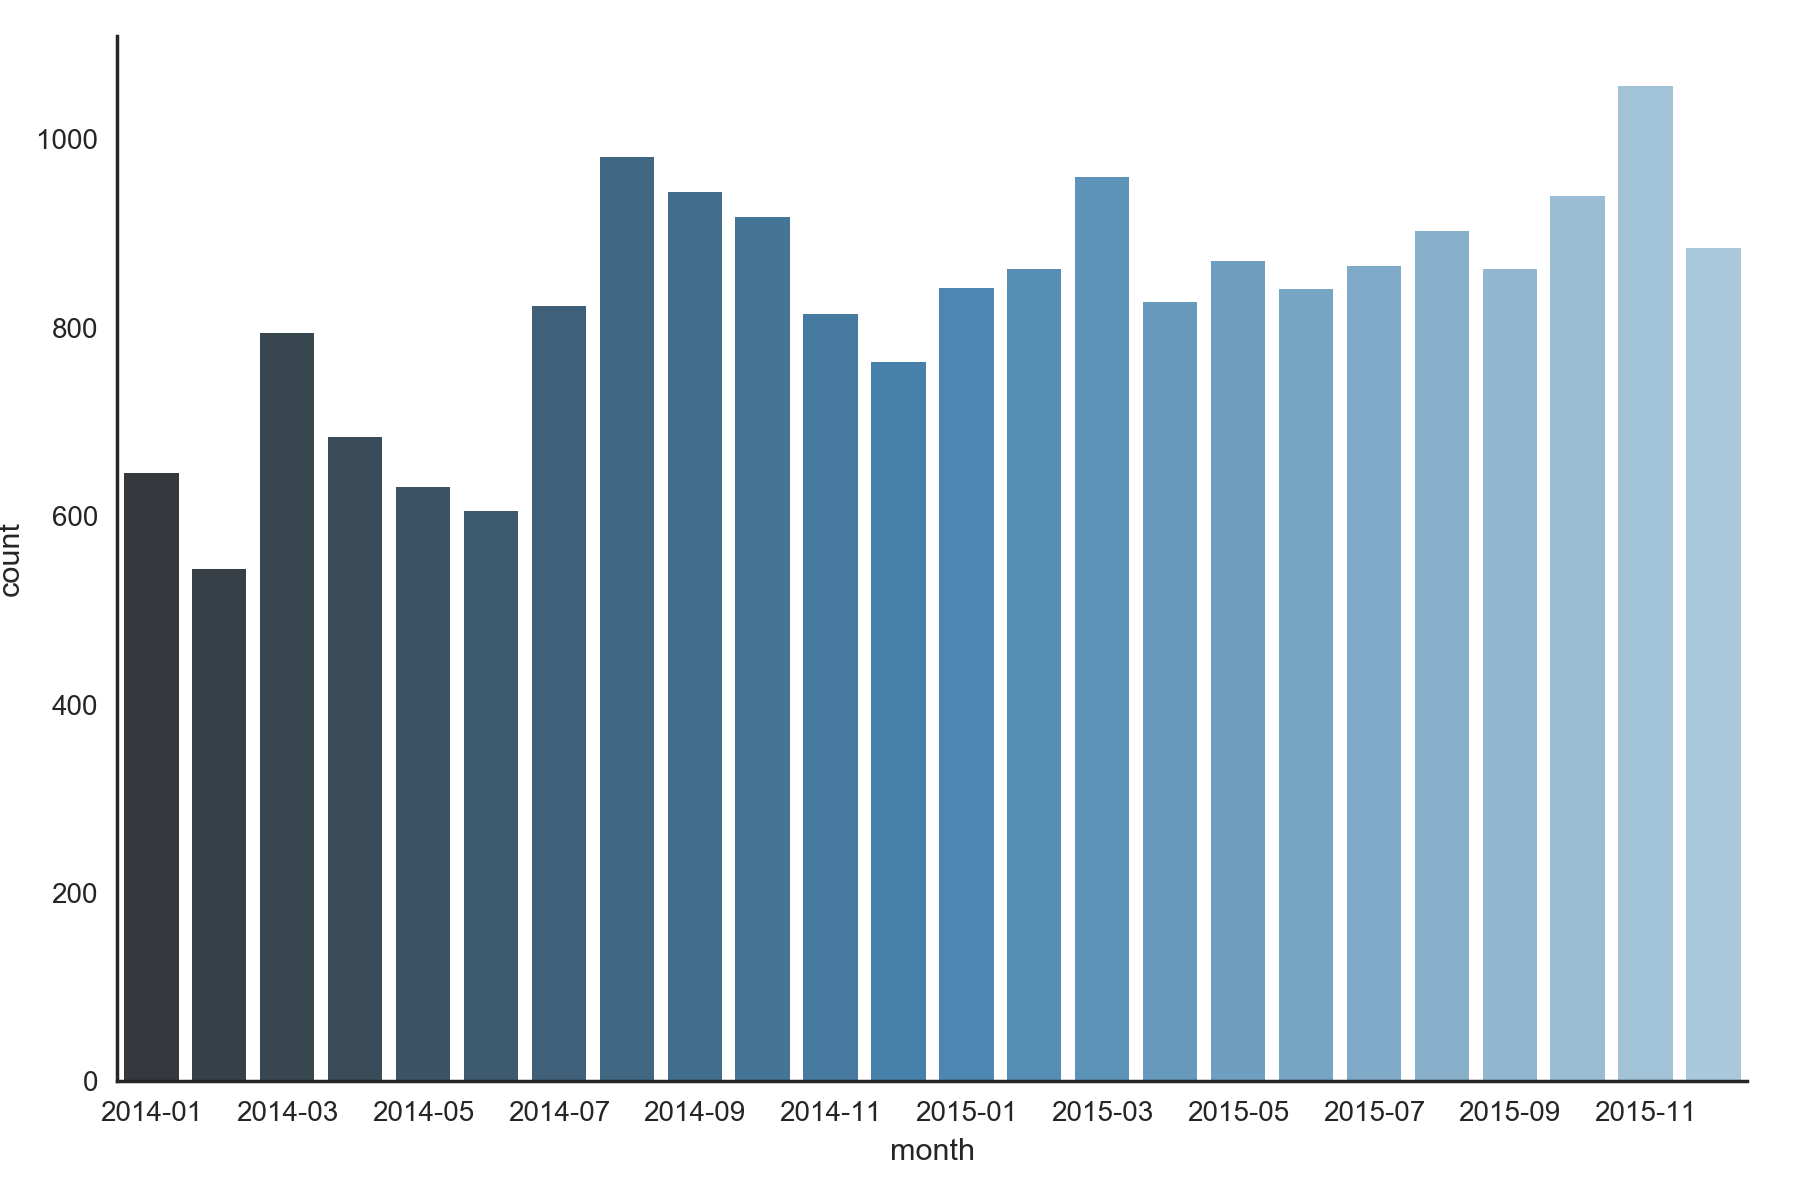

In [35]:
import numpy as np
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set(style="white")

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="month", data=ALL, kind="count",
                   palette="Blues_d", size=6, aspect=1.5, order=month_list)

g.set_xticklabels(step=2)

In [110]:
# deal with missing data

In [36]:
NULL = ALL[ALL.isnull().any(axis=1)]

In [37]:
NULL.shape

(15285, 58)

In [38]:
LEFT = ALL[~ALL.isnull().any(axis=1)]

In [39]:
LEFT.shape

(4584, 58)

In [46]:
ALL['missing'] = ALL.post_id.isin(NULL.post_id).astype(int)

In [47]:
ALL['missing'] = ALL['missing'].map({1: 'Yes', 0: "No"})

<IPython.core.display.Javascript object>


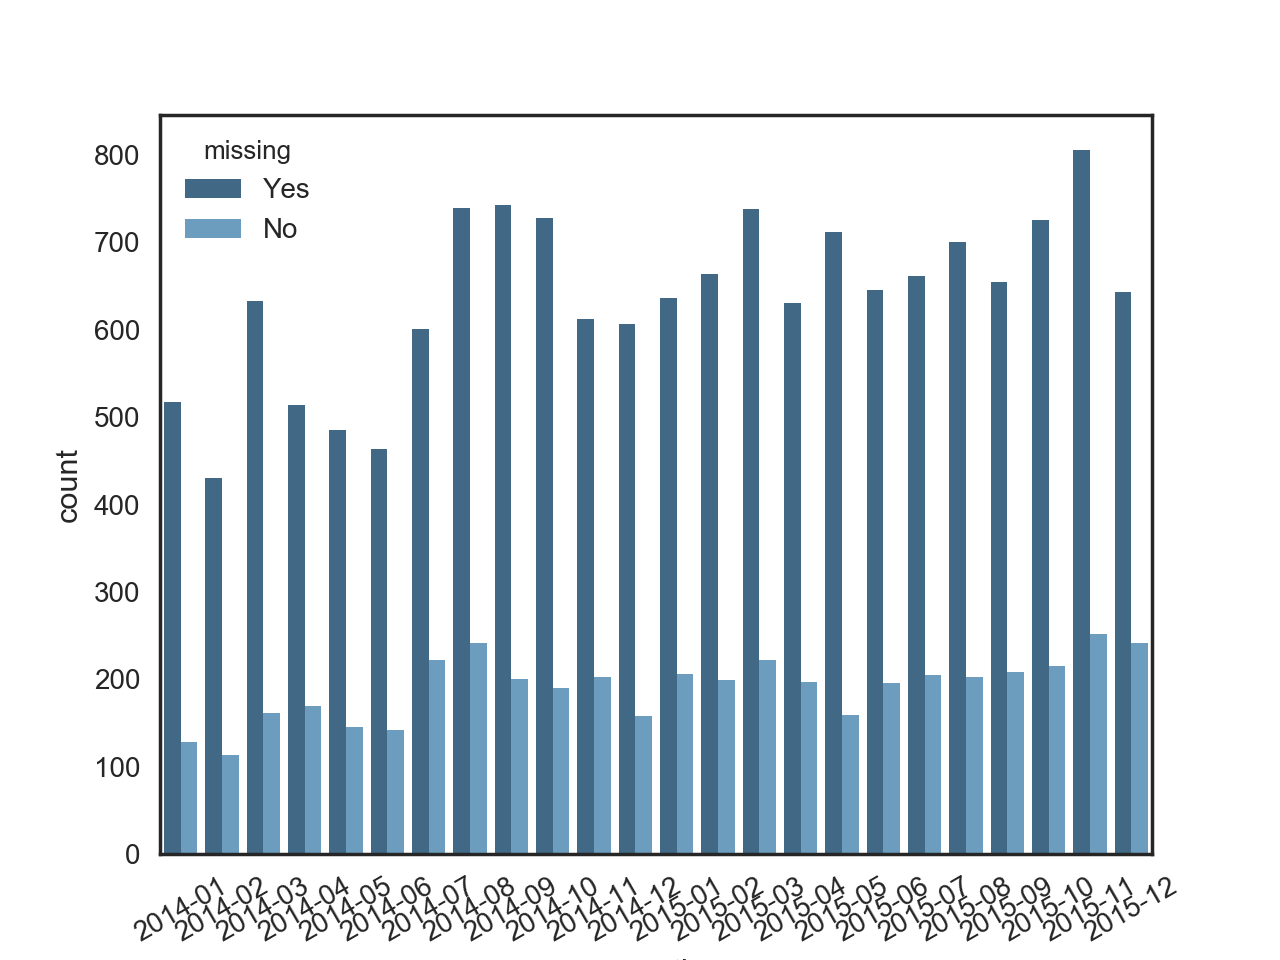

[Text(0,0,'2014-01'),
 Text(0,0,'2014-02'),
 Text(0,0,'2014-03'),
 Text(0,0,'2014-04'),
 Text(0,0,'2014-05'),
 Text(0,0,'2014-06'),
 Text(0,0,'2014-07'),
 Text(0,0,'2014-08'),
 Text(0,0,'2014-09'),
 Text(0,0,'2014-10'),
 Text(0,0,'2014-11'),
 Text(0,0,'2014-12'),
 Text(0,0,'2015-01'),
 Text(0,0,'2015-02'),
 Text(0,0,'2015-03'),
 Text(0,0,'2015-04'),
 Text(0,0,'2015-05'),
 Text(0,0,'2015-06'),
 Text(0,0,'2015-07'),
 Text(0,0,'2015-08'),
 Text(0,0,'2015-09'),
 Text(0,0,'2015-10'),
 Text(0,0,'2015-11'),
 Text(0,0,'2015-12')]

In [51]:
ax = sns.countplot(x="month", hue="missing", data=ALL, palette="Blues_d")
ax.set_xticklabels(month_list, rotation=30, label = 'month')

In [52]:
# test to see whether number of comments and score is singnificant different between null and left
stats.ttest_ind(NULL.score, LEFT.score)

Ttest_indResult(statistic=-54.54656934236449, pvalue=0.0)

In [ ]:
# see histogram of score by missing

In [55]:
ALL['year'] = ALL.month.apply(lambda x: x[:4])

In [62]:
ALL.shape

(19869, 60)

<IPython.core.display.Javascript object>


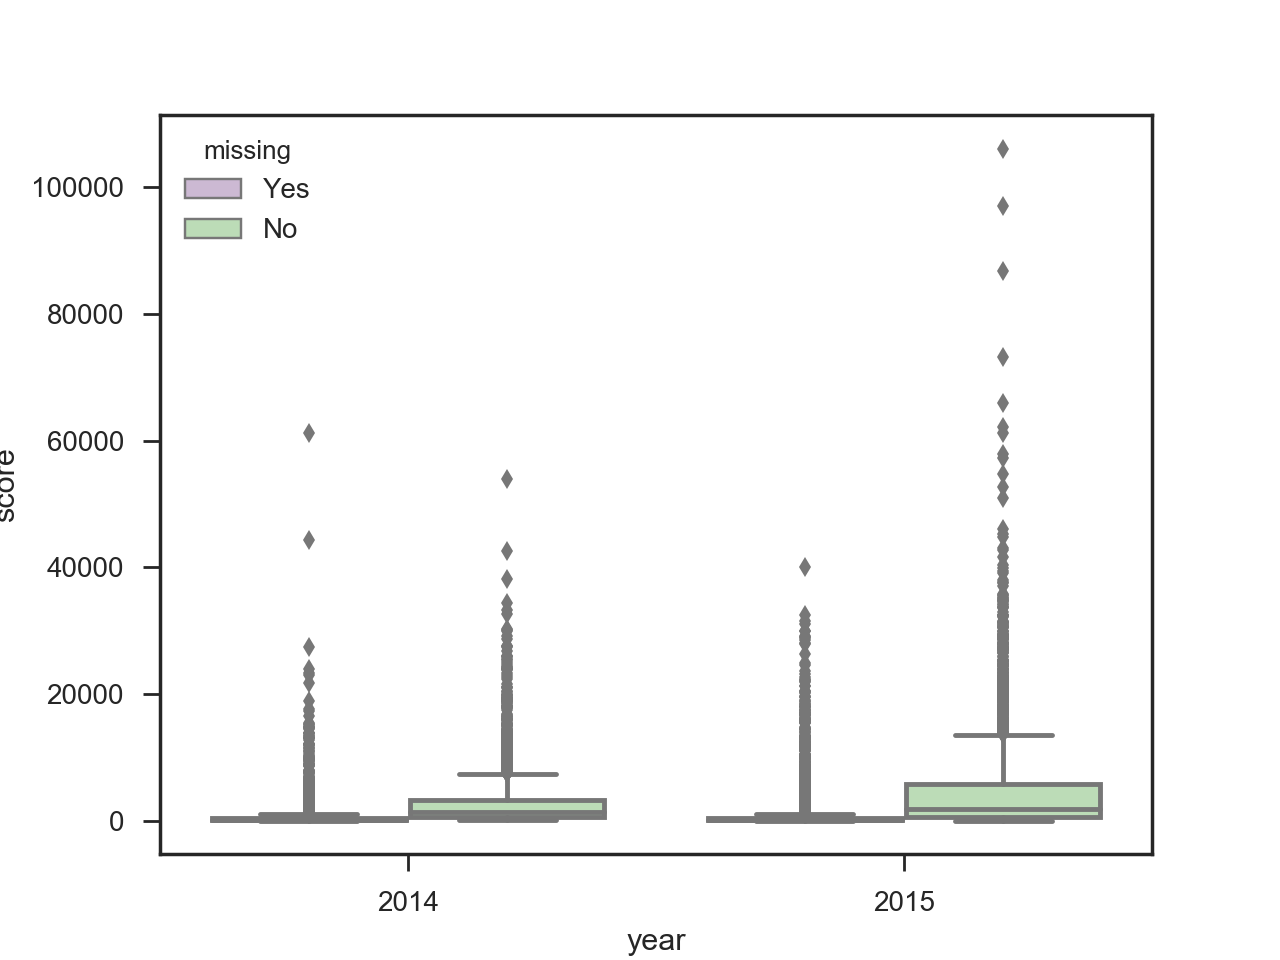

In [77]:
import seaborn as sns
sns.set(style="ticks")


# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="year", y="score", hue="missing", data=ALL, palette="PRGn")
# sns.despine(offset=10, trim=True)

In [78]:
ALL_5000 = ALL[ALL.score < 5000]

<IPython.core.display.Javascript object>


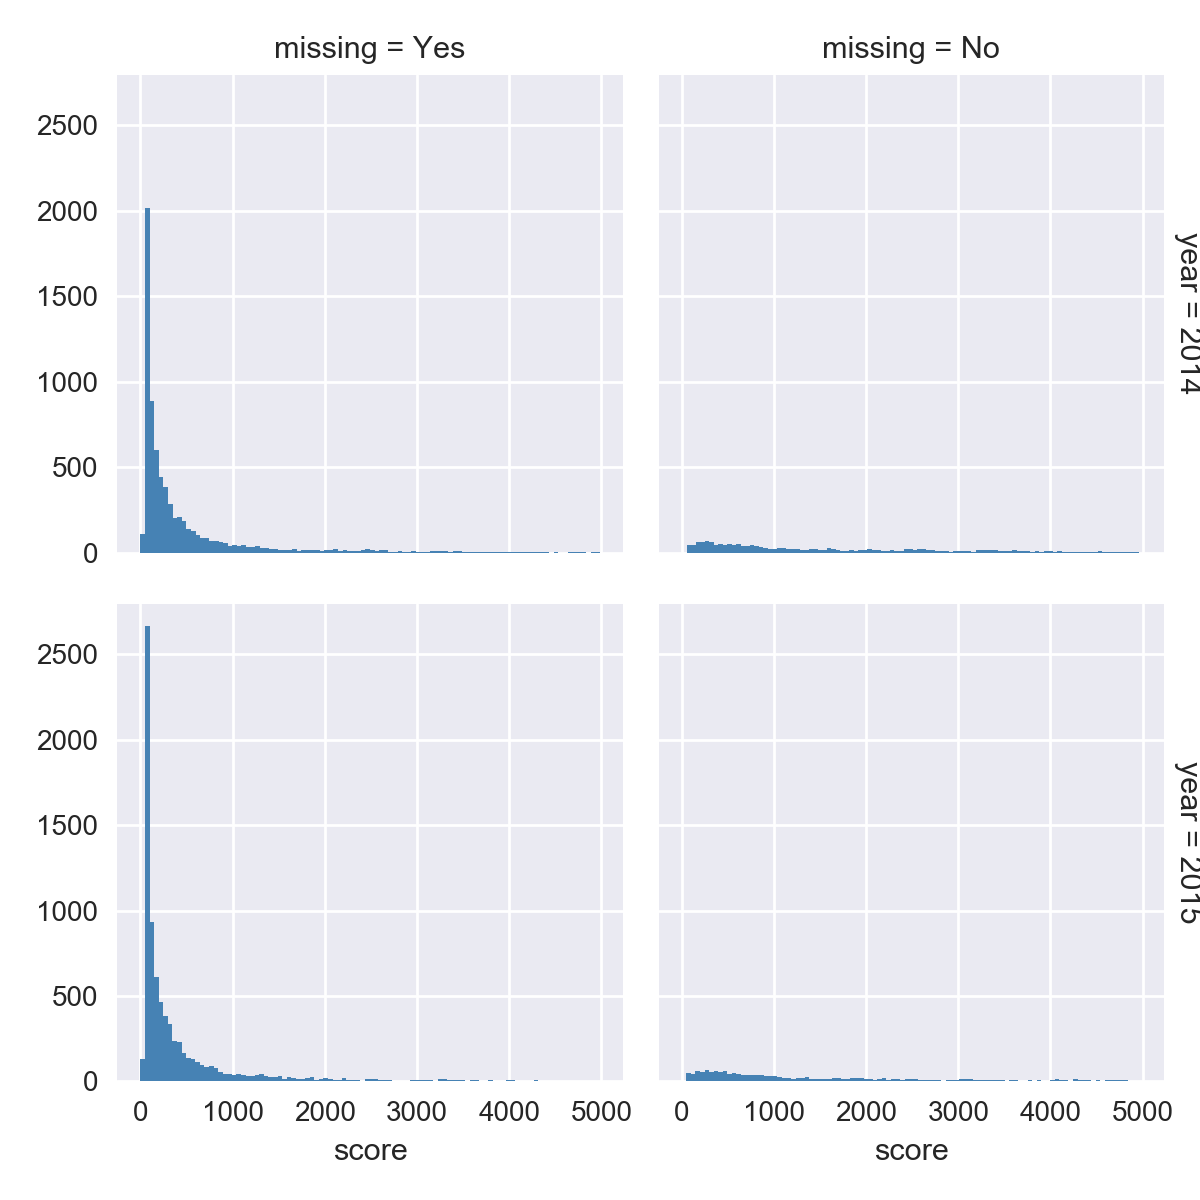

In [79]:
sns.set(style="darkgrid")


g = sns.FacetGrid(ALL_5000, col='missing', row = 'year', margin_titles=True)
g.map(plt.hist, "score", color="steelblue", lw=0, bins = 100)


In [41]:
ALL.isnull().sum()

post_id                          0
score                            0
word_count                       0
avg_wordlen                      0
diversity                        0
sent_count                       0
avg_sentl                        0
v_tag                            0
a_tag                            0
topic_1                          0
topic_2                          0
topic_3                          0
topic_4                          0
topic_5                          0
topic_6                          0
topic_7                          0
topic_8                          0
topic_9                          0
topic_10                         0
text_sentiment                   0
title_sentiment                  0
title_len                        0
perc_miss_comment_author         0
total_num_nodes                  0
total_density                    0
num_weak_component               0
num_strong_component             0
main_miss_node                 175
main_num_nodes      

In [80]:
#analysis starts here
y = LEFT.score

In [85]:
X = LEFT[x_col]

In [86]:
X.shape

(4584, 50)

In [99]:
COL_ALL = X.columns
len(COL_ALL)

50

In [50]:
X.shape

(4584, 50)

In [88]:
COL_TEXT = ['word_count',
   'avg_wordlen', 'diversity', 'sent_count', 'avg_sentl', 'v_tag', 'a_tag',
   'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
   'topic_7', 'topic_8', 'topic_9', 'topic_10', 'text_sentiment',
   'title_sentiment', 'title_len']

In [89]:
COL_STR = ['total_num_nodes', 'total_density', 'num_weak_component',
   'num_strong_component', 'main_num_nodes',
   'main_density', 'main_transitivity', 'main_avg_shortest_path',
   'main_diameter', 'main_radius', 'main_eccentricity_mean',
   'main_eccentrisity_std']

In [94]:
COL_ACT = ['avg_periphery_lkarma', 'avg_periphery_ckarma',
   'avg_center_lkarma', 'avg_center_ckarma', 'in_degree_top_avg_lkarma',
   'in_degree_top_avg_ckarma', 'out_degree_top_avg_lkarma',
   'out_degree_top_avg_ckarma', 'close_top_avg_lkarma',
   'close_top_avg_ckarma', 'between_top_avg_lkarma',
   'between_top_avg_ckarma', 'hub_top_avg_lkarma', 'hub_top_avg_ckarma',
   'auth_top_avg_lkarma', 'auth_top_avg_ckarma', 'author_lkarma',
   'author_ckarma']

In [91]:
X_text = X[COL_TEXT]
X_text.shape

(4584, 20)

In [92]:
X_str = X[COL_STR]
X_str.shape

(4584, 12)

In [95]:
X_act = X[COL_ACT]
X_act.shape

(4584, 18)

In [72]:
#split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [146]:
#ridge

In [147]:
#all 

In [97]:
def k_fold_avg(X, y, model):
    
    k = 10
    kf = KFold(n_splits=k, random_state=10, shuffle=True)
    kf.get_n_splits(X)

    r_sq_vec = np.zeros(k)
    scaler = MinMaxScaler()

    k_ind = int(0)
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X.values[train_index], X.values[test_index]
        y_train, y_valid = y.values[train_index], y.values[test_index]
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)
        model_fit = model.fit(X_train_scaled, y_train)
        r_sq_vec[k_ind] = model_fit.score(X_valid_scaled, y_valid)
        k_ind += 1


    return r_sq_vec.mean()

In [104]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [105]:
# ridge on all 
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(0, 1, 11):
    model = Ridge(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_ALL], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 0
# alpha = 0.2
# best = 0.617634

Ridge regression: effect of alpha regularization parameter



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.0 r-squared test: 0.617339

0.1 r-squared test: 0.617560

0.2 r-squared test: 0.617634

0.30000000000000004 r-squared test: 0.617549

0.4 r-squared test: 0.617340

0.5 r-squared test: 0.617035

0.6000000000000001 r-squared test: 0.616658

0.7000000000000001 r-squared test: 0.616223

0.8 r-squared test: 0.615746

0.9 r-squared test: 0.615235

1.0 r-squared test: 0.614699



In [112]:
# ridge all alpha = 0.2
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ALL])
X_test_scaled = scaler.transform(X_test[COL_ALL])

linridge_all = Ridge(alpha=0.2).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge_all.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge_all.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge_all.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_all.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge_all.coef_ != 0)))

ridge regression linear model intercept: 1251.6311368145384
ridge regression linear model coeff:
[ 2.14740276e+03  1.69919705e+03 -7.16743948e+02 -3.26213949e+03
  1.68473652e+02  6.70130038e+02  1.32781439e+03  7.61449734e+02
  1.45108305e+03  1.92631834e+02  2.81861920e+02 -2.55243070e+01
  3.90255056e+02 -4.69729891e+01  6.08622004e+02  2.42641045e+02
 -3.07586184e+02  7.07964598e+01 -7.67158824e+02  3.43266638e+01
  4.57111010e+04 -1.16306294e+03  2.63484625e+03  5.53617249e+04
 -2.54632224e+04 -3.28463466e+03 -1.63669969e+02 -3.03248413e+03
 -9.23770413e+03  5.56966969e+02  2.71708784e+03  6.26954669e+03
 -8.59793000e+02  3.75923404e+02  3.95642421e+03  2.17014959e+03
 -3.94786393e+02 -6.09842511e+02 -1.33983213e+03  9.02772729e+02
 -5.96693742e+02  2.19914866e+03  6.60952374e+01 -1.31501508e+03
 -1.31039761e+03  2.92719378e+03  3.89109302e+02 -1.11641122e+03
  2.02148025e+03  1.72655494e+03]
R-squared score (training): 0.636
R-squared score (test): 0.617
Number of non-zero featur

In [82]:
# text ridge

In [114]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(0, 100, 101):
    model = Ridge(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_TEXT], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 100
# best = -0.006107

Ridge regression: effect of alpha regularization parameter

0.0 r-squared test: -0.010065

1.0 r-squared test: -0.009153

2.0 r-squared test: -0.008982

3.0 r-squared test: -0.008835

4.0 r-squared test: -0.008706

5.0 r-squared test: -0.008589

6.0 r-squared test: -0.008484

7.0 r-squared test: -0.008387

8.0 r-squared test: -0.008299

9.0 r-squared test: -0.008217

10.0 r-squared test: -0.008140

11.0 r-squared test: -0.008069

12.0 r-squared test: -0.008001

13.0 r-squared test: -0.007938

14.0 r-squared test: -0.007878

15.0 r-squared test: -0.007821

16.0 r-squared test: -0.007766

17.0 r-squared test: -0.007714

18.0 r-squared test: -0.007665

19.0 r-squared test: -0.007617

20.0 r-squared test: -0.007572

21.0 r-squared test: -0.007528

22.0 r-squared test: -0.007485

23.0 r-squared test: -0.007445

24.0 r-squared test: -0.007406

25.0 r-squared test: -0.007368

26.0 r-squared test: -0.007331

27.0 r-squared test: -0.007296

28.0 r-squared test: -0.007261

29.0 r-squared test: -

In [115]:
# ridge text alpha = 100
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_TEXT])
X_test_scaled = scaler.transform(X_test[COL_TEXT])

linridge_text = Ridge(alpha=100).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge_text.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge_text.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge_text.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_text.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge_text.coef_ != 0)))

ridge regression linear model intercept: 4737.813393326645
ridge regression linear model coeff:
[  69.40725314   46.75118107 -725.61576497  -85.25948141   78.77884672
 -119.63995838  324.00878576  808.37045232  398.04102294 -178.67813895
 -129.33440214  -86.13153696  -18.74745539 -529.37149449   73.2559583
   41.39539544 -313.50383501   84.33826932 -290.94834213 -325.50068948]
R-squared score (training): 0.003
R-squared score (test): -0.001
Number of non-zero features: 20


In [87]:
#structure

In [117]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(0, 1, 11):
    model = Ridge(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_STR], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 0
# alpha = 0
# best = 0.617977

Ridge regression: effect of alpha regularization parameter

0.0 r-squared test: 0.617977

0.1 r-squared test: 0.617819

0.2 r-squared test: 0.617725

0.30000000000000004 r-squared test: 0.617521

0.4 r-squared test: 0.617217

0.5 r-squared test: 0.616832

0.6000000000000001 r-squared test: 0.616383

0.7000000000000001 r-squared test: 0.615885

0.8 r-squared test: 0.615348

0.9 r-squared test: 0.614782

1.0 r-squared test: 0.614194



In [118]:
# ridge structure alpha = 0
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_STR])
X_test_scaled = scaler.transform(X_test[COL_STR])

linridge_str = Ridge(alpha=0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge_str.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge_str.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge_str.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_str.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge_str.coef_ != 0)))

ridge regression linear model intercept: 2511.284016491111
ridge regression linear model coeff:
[153096.93905149   -856.22031102   -619.77388833 -25078.16818322
 -49786.76962974  -3476.65275429   -286.00945109  -3311.39250453
 -10551.25516298    449.02922258   3873.25350919   6533.80589714]
R-squared score (training): 0.631
R-squared score (test): 0.611
Number of non-zero features: 12


In [90]:
#ridge actor

In [120]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(3, 5, 21):
    model = Ridge(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_ACT], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 4
# alpha = 4.2
# best = 0.007930

Ridge regression: effect of alpha regularization parameter

3.0 r-squared test: 0.007871



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


3.1 r-squared test: 0.007881

3.2 r-squared test: 0.007890

3.3 r-squared test: 0.007898

3.4 r-squared test: 0.007904

3.5 r-squared test: 0.007910

3.6 r-squared test: 0.007915

3.7 r-squared test: 0.007919

3.8 r-squared test: 0.007923

3.9 r-squared test: 0.007926

4.0 r-squared test: 0.007928

4.1 r-squared test: 0.007929

4.2 r-squared test: 0.007930

4.3 r-squared test: 0.007930

4.4 r-squared test: 0.007929

4.5 r-squared test: 0.007928

4.6 r-squared test: 0.007927

4.7 r-squared test: 0.007925

4.8 r-squared test: 0.007922

4.9 r-squared test: 0.007920

5.0 r-squared test: 0.007916



In [121]:
# ridge actor alpha = 4.2
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ACT])
X_test_scaled = scaler.transform(X_test[COL_ACT])

linridge_act = Ridge(alpha=4.2).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge_act.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge_act.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge_act.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_act.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge_act.coef_ != 0)))

ridge regression linear model intercept: 3567.559247104796
ridge regression linear model coeff:
[-2327.78927811   378.56062855  -105.30060996  5002.98814525
 -2580.44116767  2683.34047886  -352.95601569  4264.30104573
 -2676.45277643  2135.32083455   -44.49237448  1403.6564547
  -548.52891369  3143.71164421 -1367.95856779  -817.47929414
  1535.79115675  1399.32210549]
R-squared score (training): 0.014
R-squared score (test): 0.020
Number of non-zero features: 18


In [117]:
# lasso
# all

In [123]:
print('lasso regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(0, 2, 21):
    model = Lasso(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_ALL], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 1
# alpha = 0.5
# best = 0.618505

lasso regression: effect of alpha regularization parameter



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0 r-squared test: 0.617354

0.1 r-squared test: 0.618141

0.2 r-squared test: 0.618384

0.30000000000000004 r-squared test: 0.618472

0.4 r-squared test: 0.618502

0.5 r-squared test: 0.618505

0.6000000000000001 r-squared test: 0.618482

0.7000000000000001 r-squared test: 0.618486

0.8 r-squared test: 0.618484

0.9 r-squared test: 0.618443

1.0 r-squared test: 0.618401

1.1 r-squared test: 0.618341

1.2000000000000002 r-squared test: 0.618252

1.3 r-squared test: 0.618139

1.4000000000000001 r-squared test: 0.618054

1.5 r-squared test: 0.618039

1.6 r-squared test: 0.618051

1.7000000000000002 r-squared test: 0.618049

1.8 r-squared test: 0.618031

1.9000000000000001 r-squared test: 0.618007

2.0 r-squared test: 0.617975



In [124]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ALL])
X_test_scaled = scaler.transform(X_test[COL_ALL])

linlasso_all = Lasso(alpha=0.5, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso_all.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso_all.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso_all.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso_all.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso_all.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso_all.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 1576.9288346489684
lasso regression linear model coeff:
[ 1.18489448e+03  1.67139728e+03 -7.26917988e+02 -2.22592708e+03
  9.66039076e+01  5.92103948e+02  1.21510437e+03  5.06587596e+02
  1.19748684e+03 -5.52951048e+01  0.00000000e+00 -1.95877204e+02
  1.37291580e+02 -2.85317584e+02  3.82520167e+02 -0.00000000e+00
 -5.54241446e+02  6.73888381e+01 -7.81817361e+02  5.17625870e+01
  1.10469433e+05 -7.52920068e+02  4.01742804e+02  7.59108954e+03
 -4.11122166e+04 -3.36925267e+03 -1.06981808e+02 -2.96390384e+03
 -7.88901980e+03  1.34417484e+02  2.30278088e+03  5.59795708e+03
 -0.00000000e+00  1.11761486e+02  1.18434862e+03  2.03436945e+03
 -0.00000000e+00 -0.00000000e+00 -3.93512750e+02  0.00000000e+00
 -4.80902812e+02  1.37005070e+03 -0.00000000e+00 -3.95849070e+02
 -0.00000000e+00  2.65959703e+03 -0.00000000e+00 -7.68091453e+02
  1.97454692e+03  1.70734672e+03]
Non-zero features: 41
R-squared score (training): 0.637
R-squared score (test): 0.616

Fe

In [99]:
# lasso text

In [125]:
print('lasso regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(0, 100, 101):
    model = Lasso(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_TEXT], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 73
# best = -0.005047

lasso regression: effect of alpha regularization parameter



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0 r-squared test: -0.010018

1.0 r-squared test: -0.008654

2.0 r-squared test: -0.007892

3.0 r-squared test: -0.007580

4.0 r-squared test: -0.007411

5.0 r-squared test: -0.007247

6.0 r-squared test: -0.006998

7.0 r-squared test: -0.006768

8.0 r-squared test: -0.006541

9.0 r-squared test: -0.006365

10.0 r-squared test: -0.006254

11.0 r-squared test: -0.006085

12.0 r-squared test: -0.005937

13.0 r-squared test: -0.005800

14.0 r-squared test: -0.005657

15.0 r-squared test: -0.005539

16.0 r-squared test: -0.005439

17.0 r-squared test: -0.005361

18.0 r-squared test: -0.005282

19.0 r-squared test: -0.005213

20.0 r-squared test: -0.005154

21.0 r-squared test: -0.005109

22.0 r-squared test: -0.005062

23.0 r-squared test: -0.005010

24.0 r-squared test: -0.004973

25.0 r-squared test: -0.004953

26.0 r-squared test: -0.004948

27.0 r-squared test: -0.004959

28.0 r-squared test: -0.004974

29.0 r-squared test: -0.004996

30.0 r-squared test: -0.005036

31.0 r-squared tes

In [160]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_TEXT])
X_test_scaled = scaler.transform(X_test[COL_TEXT])

linlasso_text = Lasso(alpha=73, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso_text.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso_text.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso_text.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso_text.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso_text.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(COL_TEXT), linlasso_text.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 4341.648486501227
lasso regression linear model coeff:
[ 0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.
 -0. -0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.000

Features with non-zero weight (sorted by absolute magnitude):


In [102]:
# lasso structure

In [128]:
print('lasso regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(0, 1, 11):
    model = Lasso(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_STR], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 0
# alpha = 0.3
# best = 0.618397

lasso regression: effect of alpha regularization parameter



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.0 r-squared test: 0.617977

0.1 r-squared test: 0.618332

0.2 r-squared test: 0.618394

0.30000000000000004 r-squared test: 0.618397

0.4 r-squared test: 0.618358

0.5 r-squared test: 0.618311

0.6000000000000001 r-squared test: 0.618256

0.7000000000000001 r-squared test: 0.618235

0.8 r-squared test: 0.618172

0.9 r-squared test: 0.618093

1.0 r-squared test: 0.617973



In [133]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_STR])
X_test_scaled = scaler.transform(X_test[COL_STR])

linlasso_str = Lasso(alpha=0.3, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso_str.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso_str.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso_str.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso_text.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso_text.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(COL_STR), linlasso_str.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 2491.3430229911683
lasso regression linear model coeff:
[ 1.17128850e+05 -1.01399632e+03  0.00000000e+00  2.78345979e+03
 -4.24331618e+04 -3.36058327e+03 -2.91621062e+02 -3.15401275e+03
 -9.06974429e+03  1.02625014e+02  3.21986163e+03  5.94001848e+03]
Non-zero features: 11
R-squared score (training): 0.631
R-squared score (test): 0.612

Features with non-zero weight (sorted by absolute magnitude):
	total_num_nodes, 117128.850
	main_num_nodes, -42433.162
	main_diameter, -9069.744
	main_eccentrisity_std, 5940.018
	main_density, -3360.583
	main_eccentricity_mean, 3219.862
	main_avg_shortest_path, -3154.013
	num_strong_component, 2783.460
	total_density, -1013.996
	main_transitivity, -291.621
	main_radius, 102.625


In [105]:
# actor

In [132]:
print('lasso regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(1, 3, 21):
    model = Lasso(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_ACT], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 2
# alpha = 2
# best = 0.007397

lasso regression: effect of alpha regularization parameter

1.0 r-squared test: 0.007109



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


1.1 r-squared test: 0.007146

1.2 r-squared test: 0.007188

1.3 r-squared test: 0.007233

1.4 r-squared test: 0.007276

1.5 r-squared test: 0.007309

1.6 r-squared test: 0.007337

1.7000000000000002 r-squared test: 0.007359

1.8 r-squared test: 0.007377

1.9 r-squared test: 0.007390

2.0 r-squared test: 0.007397

2.1 r-squared test: 0.007396

2.2 r-squared test: 0.007389

2.3 r-squared test: 0.007377

2.4000000000000004 r-squared test: 0.007353

2.5 r-squared test: 0.007338

2.6 r-squared test: 0.007324

2.7 r-squared test: 0.007309

2.8 r-squared test: 0.007291

2.9000000000000004 r-squared test: 0.007270

3.0 r-squared test: 0.007246



In [135]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ACT])
X_test_scaled = scaler.transform(X_test[COL_ACT])

linlasso_act = Lasso(alpha=2, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso_act.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso_act.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso_act.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso_act.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso_act.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(COL_ACT), linlasso_act.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 3518.1877172609693
lasso regression linear model coeff:
[-3363.01033602     0.            -0.          7284.36852153
 -4194.7943716   2303.80225472    -0.          6014.75024929
 -3205.40780296  2014.8960257      0.             0.
    -0.          3320.94478825    -0.          -581.38681089
  1569.72472877  1293.96942384]
Non-zero features: 11
R-squared score (training): 0.015
R-squared score (test): 0.022

Features with non-zero weight (sorted by absolute magnitude):
	avg_center_ckarma, 7284.369
	out_degree_top_avg_ckarma, 6014.750
	in_degree_top_avg_lkarma, -4194.794
	avg_periphery_lkarma, -3363.010
	hub_top_avg_ckarma, 3320.945
	close_top_avg_lkarma, -3205.408
	in_degree_top_avg_ckarma, 2303.802
	close_top_avg_ckarma, 2014.896
	author_lkarma, 1569.725
	author_ckarma, 1293.969
	auth_top_avg_ckarma, -581.387


In [113]:
#evaluation

In [153]:
# ridge all
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ALL])
X_test_scaled = scaler.transform(X_test)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linridge_all.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linridge_all.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [ 2.14740276e+03  1.69919705e+03 -7.16743948e+02 -3.26213949e+03
  1.68473652e+02  6.70130038e+02  1.32781439e+03  7.61449734e+02
  1.45108305e+03  1.92631834e+02  2.81861920e+02 -2.55243070e+01
  3.90255056e+02 -4.69729891e+01  6.08622004e+02  2.42641045e+02
 -3.07586184e+02  7.07964598e+01 -7.67158824e+02  3.43266638e+01
  4.57111010e+04 -1.16306294e+03  2.63484625e+03  5.53617249e+04
 -2.54632224e+04 -3.28463466e+03 -1.63669969e+02 -3.03248413e+03
 -9.23770413e+03  5.56966969e+02  2.71708784e+03  6.26954669e+03
 -8.59793000e+02  3.75923404e+02  3.95642421e+03  2.17014959e+03
 -3.94786393e+02 -6.09842511e+02 -1.33983213e+03  9.02772729e+02
 -5.96693742e+02  2.19914866e+03  6.60952374e+01 -1.31501508e+03
 -1.31039761e+03  2.92719378e+03  3.89109302e+02 -1.11641122e+03
  2.02148025e+03  1.72655494e+03]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 21181300.33
r2_score (dummy): -0.00
r2_score (linear model): 0.62


In [154]:
# ridge text
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_TEXT])
X_test_scaled = scaler.transform(X_test[COL_TEXT])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linridge_text.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linridge_text.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [  69.40725314   46.75118107 -725.61576497  -85.25948141   78.77884672
 -119.63995838  324.00878576  808.37045232  398.04102294 -178.67813895
 -129.33440214  -86.13153696  -18.74745539 -529.37149449   73.2559583
   41.39539544 -313.50383501   84.33826932 -290.94834213 -325.50068948]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 55331421.29
r2_score (dummy): -0.00
r2_score (linear model): -0.00


In [155]:
# ridge structure
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_STR])
X_test_scaled = scaler.transform(X_test[COL_STR])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linridge_str.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linridge_str.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [153096.93905149   -856.22031102   -619.77388833 -25078.16818322
 -49786.76962974  -3476.65275429   -286.00945109  -3311.39250453
 -10551.25516298    449.02922258   3873.25350919   6533.80589714]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 21493650.37
r2_score (dummy): -0.00
r2_score (linear model): 0.61


In [156]:
# ridge actor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ACT])
X_test_scaled = scaler.transform(X_test[COL_ACT])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linridge_act.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linridge_act.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [-2327.78927811   378.56062855  -105.30060996  5002.98814525
 -2580.44116767  2683.34047886  -352.95601569  4264.30104573
 -2676.45277643  2135.32083455   -44.49237448  1403.6564547
  -548.52891369  3143.71164421 -1367.95856779  -817.47929414
  1535.79115675  1399.32210549]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 54137675.17
r2_score (dummy): -0.00
r2_score (linear model): 0.02


In [157]:
# lasso all
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ALL])
X_test_scaled = scaler.transform(X_test[COL_ALL])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linlasso_all.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linlasso_all.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [ 1.18489448e+03  1.67139728e+03 -7.26917988e+02 -2.22592708e+03
  9.66039076e+01  5.92103948e+02  1.21510437e+03  5.06587596e+02
  1.19748684e+03 -5.52951048e+01  0.00000000e+00 -1.95877204e+02
  1.37291580e+02 -2.85317584e+02  3.82520167e+02 -0.00000000e+00
 -5.54241446e+02  6.73888381e+01 -7.81817361e+02  5.17625870e+01
  1.10469433e+05 -7.52920068e+02  4.01742804e+02  7.59108954e+03
 -4.11122166e+04 -3.36925267e+03 -1.06981808e+02 -2.96390384e+03
 -7.88901980e+03  1.34417484e+02  2.30278088e+03  5.59795708e+03
 -0.00000000e+00  1.11761486e+02  1.18434862e+03  2.03436945e+03
 -0.00000000e+00 -0.00000000e+00 -3.93512750e+02  0.00000000e+00
 -4.80902812e+02  1.37005070e+03 -0.00000000e+00 -3.95849070e+02
 -0.00000000e+00  2.65959703e+03 -0.00000000e+00 -7.68091453e+02
  1.97454692e+03  1.70734672e+03]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 21247059.25
r2_score (dummy): -0.00
r2_score (linear model): 0.62


In [161]:
# lasso text
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_TEXT])
X_test_scaled = scaler.transform(X_test[COL_TEXT])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linlasso_text.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linlasso_text.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [ 0.  0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.
 -0. -0.]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 55271237.27
r2_score (dummy): -0.00
r2_score (linear model): -0.00


In [162]:
# lasso structure
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_STR])
X_test_scaled = scaler.transform(X_test[COL_STR])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linlasso_str.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linlasso_str.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [ 1.17128850e+05 -1.01399632e+03  0.00000000e+00  2.78345979e+03
 -4.24331618e+04 -3.36058327e+03 -2.91621062e+02 -3.15401275e+03
 -9.06974429e+03  1.02625014e+02  3.21986163e+03  5.94001848e+03]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 21454728.37
r2_score (dummy): -0.00
r2_score (linear model): 0.61


In [164]:
# lasso actor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_ACT])
X_test_scaled = scaler.transform(X_test[COL_ACT])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linlasso_act.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linlasso_act.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [-3363.01033602     0.            -0.          7284.36852153
 -4194.7943716   2303.80225472    -0.          6014.75024929
 -3205.40780296  2014.8960257      0.             0.
    -0.          3320.94478825    -0.          -581.38681089
  1569.72472877  1293.96942384]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 54042340.47
r2_score (dummy): -0.00
r2_score (linear model): 0.02


In [167]:
COL_SUB=['word_count', 'avg_wordlen', 'diversity', 'sent_count', 'avg_sentl',
       'v_tag', 'a_tag', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'text_sentiment', 'title_sentiment', 'title_len', 
       'total_density',  'main_density', 'main_transitivity',
       'main_eccentricity_mean', 'main_eccentrisity_std',
       'avg_periphery_lkarma', 'avg_periphery_ckarma', 'avg_center_lkarma',
       'avg_center_ckarma', 'in_degree_top_avg_lkarma',
       'in_degree_top_avg_ckarma', 'out_degree_top_avg_lkarma',
       'out_degree_top_avg_ckarma', 'close_top_avg_lkarma',
       'close_top_avg_ckarma', 'between_top_avg_lkarma',
       'between_top_avg_ckarma', 'hub_top_avg_lkarma', 'hub_top_avg_ckarma',
       'auth_top_avg_lkarma', 'auth_top_avg_ckarma', 'author_lkarma',
       'author_ckarma']

In [173]:
# lasso sub
print('lasso regression: effect of alpha regularization parameter\n')
for this_alpha in np.linspace(3, 5, 21):
    model = Lasso(alpha = this_alpha, max_iter = 10000)
    r2 = k_fold_avg(X_train[COL_SUB], y_train, model)
    print(this_alpha, 'r-squared test: {:.6f}\n'.format(r2))
# alpha = 4
# alpha = 3.9
# best = 0.225003

lasso regression: effect of alpha regularization parameter



/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


3.0 r-squared test: 0.224817

3.1 r-squared test: 0.224860

3.2 r-squared test: 0.224897

3.3 r-squared test: 0.224928

3.4 r-squared test: 0.224954

3.5 r-squared test: 0.224974

3.6 r-squared test: 0.224990

3.7 r-squared test: 0.224998

3.8 r-squared test: 0.225002

3.9 r-squared test: 0.225003

4.0 r-squared test: 0.225001

4.1 r-squared test: 0.225000

4.2 r-squared test: 0.224995

4.3 r-squared test: 0.224988

4.4 r-squared test: 0.224980

4.5 r-squared test: 0.224969

4.6 r-squared test: 0.224956

4.7 r-squared test: 0.224942

4.8 r-squared test: 0.224923

4.9 r-squared test: 0.224905

5.0 r-squared test: 0.224890



In [174]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_SUB])
X_test_scaled = scaler.transform(X_test[COL_SUB])

linlasso_sub = Lasso(alpha=3.9, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso_sub.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso_sub.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso_sub.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso_sub.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso_sub.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(COL_SUB), linlasso_sub.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1727.6874246014509
lasso regression linear model coeff:
[    -0.              0.           -776.29986035     -0.
      0.           -859.06267998    681.64821628    905.48315884
    704.16519605   -302.70712593      0.             -0.
    372.10689744   -474.95515249     -0.            219.09751308
   -364.14012013     59.47591943   -632.6462671    -663.48363539
 -18470.93721318   4254.83617582  -2680.688617    21843.21557155
  -7333.12134728     -0.             -0.              0.
   4774.64172828     -0.              0.              0.
   2550.6050657      -0.           2489.21753401     -0.
     99.38131368      0.            267.51401259     -0.
     -0.           1160.94512155   1138.77699049]
Non-zero features: 25
R-squared score (training): 0.236
R-squared score (test): 0.208

Features with non-zero weight (sorted by absolute magnitude):
	main_eccentricity_mean, 21843.216
	total_density, -18470.937
	main_eccentrisity_std, -7

In [175]:
# lasso sub
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[COL_SUB])
X_test_scaled = scaler.transform(X_test[COL_SUB])
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train_scaled, y_train)
y_predict = linlasso_sub.predict(X_test_scaled)
y_predict_dummy = lm_dummy_mean.predict(X_test_scaled)
print('Linear model, coefficients: ', linlasso_sub.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [    -0.              0.           -776.29986035     -0.
      0.           -859.06267998    681.64821628    905.48315884
    704.16519605   -302.70712593      0.             -0.
    372.10689744   -474.95515249     -0.            219.09751308
   -364.14012013     59.47591943   -632.6462671    -663.48363539
 -18470.93721318   4254.83617582  -2680.688617    21843.21557155
  -7333.12134728     -0.             -0.              0.
   4774.64172828     -0.              0.              0.
   2550.6050657      -0.           2489.21753401     -0.
     99.38131368      0.            267.51401259     -0.
     -0.           1160.94512155   1138.77699049]
Mean squared error (dummy): 55271237.27
Mean squared error (linear model): 43759410.81
r2_score (dummy): -0.00
r2_score (linear model): 0.21


In [234]:
ALL[ALL.values  == "comment_karma"]

,post_id,score,num_comments,word_count,avg_wordlen,diversity,sent_count,avg_sentl,v_tag,a_tag,...,close_top_avg_lkarma,close_top_avg_ckarma,between_top_avg_lkarma,between_top_avg_ckarma,hub_top_avg_lkarma,hub_top_avg_ckarma,auth_top_avg_lkarma,auth_top_avg_ckarma,author_lkarma,author_ckarma
17030,3n92m4,920,367,593,4.531197,0.445194,23,25.782609,0.160202,0.087690,...,64.000000,29536.000000,64.000000,29536.0,3798.000000,287250.000000,22998.000000,27651.0,link_karma,comment_karma
17342,3ogn6a,657,488,625,4.584000,0.448000,21,29.761905,0.134400,0.060800,...,18247.666667,34704.333333,18018.666667,29279.0,1940.333333,21484.666667,15.333333,11667.0,link_karma,comment_karma
19586,3xokji,14423,595,38,4.236842,0.789474,2,19.000000,0.052632,0.078947,...,5523.500000,303858.000000,1675.000000,118531.0,12694.000000,328949.500000,3359.000000,93626.5,link_karma,comment_karma
19600,3xqux2,760,141,812,4.663793,0.401478,29,28.000000,0.173645,0.064039,...,5.000000,2796.000000,497.000000,188856.0,1.000000,3302.000000,497.000000,188856.0,link_karma,comment_karma


In [ ]:
X.convert_objects(convert_numeric=True)

In [192]:
FULL_DF[FULL_DF.score == FULL_DF.score.max()]['post_id']

14082    3aitv7
Name: post_id, dtype: object

In [234]:
import pandas as pd 
import json
import networkx as nx
import os.path
%matplotlib notebook
import matplotlib.pyplot as plt
    

FULL_DATA = pd.read_csv('full_data_clean.csv')
POST_ID = FULL_DATA['post_id']
FULL_DATA = FULL_DATA.set_index('post_id')
AUTHOR = pd.read_csv('author.csv')
AUTHOR = AUTHOR.set_index('author_id')


def get_edges(post_id):

	none_num = 0
	edge_info = {}
	filepath = 'comments/' + post_id + '.json'
	author = FULL_DATA.ix[post_id]['author']
	if os.path.exists(filepath):
		with open(filepath) as js:
			comment_d = json.load(js)
			comment_num = len(comment_d)

		for key, value in comment_d.items():
			parent = value['parent']
			sender = value['author']
			if sender == 'None':
				none_num += 1
			else:
				if parent != post_id:
					receiver = comment_d[parent]['author']
				else:
					receiver = author

				if receiver != 'None':
					edge_info.setdefault(sender, {})
					edge_info[sender].setdefault(receiver, {'weight':0})
					edge_info[sender][receiver]['weight'] = \
					edge_info[sender][receiver].get('weight', 0) + 1

	else:
		return None, None

	return edge_info, none_num/comment_num


def get_main_component(digraph, weak=False):
    
    if weak:
        sub_graphs = list(nx.weakly_connected_component_subgraphs(digraph))
    else:
        sub_graphs = list(nx.strongly_connected_component_subgraphs(digraph))
    main_graph = sub_graphs[0]
    main_graph_num_nodes = main_graph.number_of_nodes()
    for graph in sub_graphs[1:]:
        num_of_nodes = graph.number_of_nodes()
        if num_of_nodes > main_graph_num_nodes:
            main_graph = graph
            main_graph_num_nodes = num_of_nodes

    return main_graph

def add_author_info(graph):
	'''
	return a graph with author information and percentage of nodes with 
	missing info
	'''

	for node in graph.nodes():
		try:
			graph.node[node]['link_karma'], \
			graph.node[node]['comment_karma'] = AUTHOR.loc[node]
		except:
			graph.node[node]['link_karma'] = 0
			graph.node[node]['comment_karma'] = 0

	d = dict(graph.nodes(data=True))
	none_num = sum(value['link_karma'] == None for value in list(d.values()))

	return graph, none_num/graph.number_of_nodes()


In [197]:
LEFT_2 = LEFT[(LEFT['hub_top_avg_ckarma'] <= 500000) & (LEFT['score'] <= 60000)]

<IPython.core.display.Javascript object>


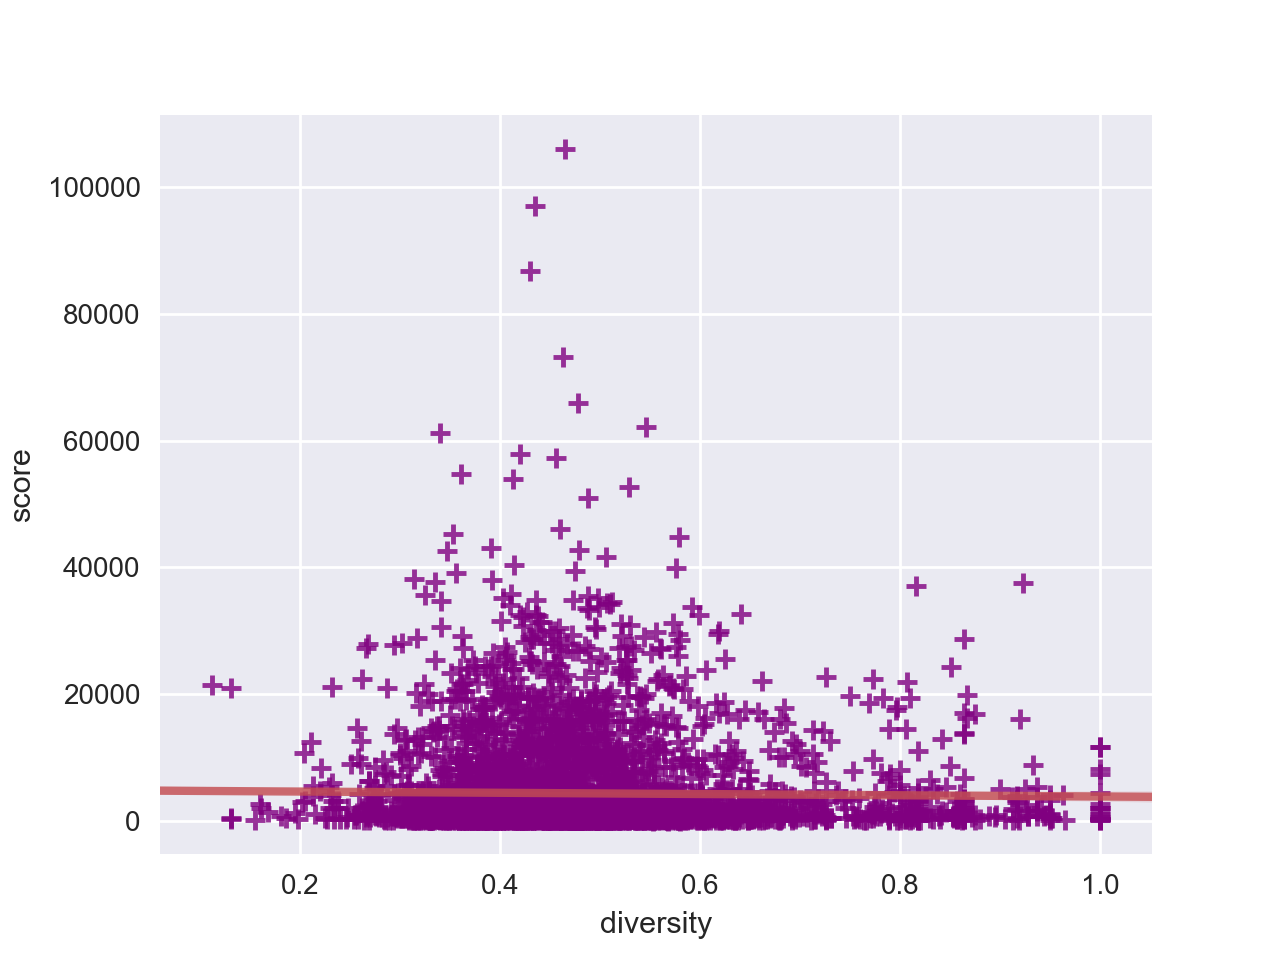

In [202]:
import seaborn as sns; sns.set(color_codes=True)

# plot
sns.regplot(x=LEFT['diversity'], y=LEFT['score'], 
            line_kws={"color":"r","alpha":0.8,"lw":3}, color='purple', marker = '+', ci=95)
#sns.plt.show()

In [363]:
LEFT.sort_values(by=['score'], ascending=False)[['post_id', 'score'] + COL_STR][:1000]

,post_id,score,total_num_nodes,total_density,num_weak_component,num_strong_component,main_num_nodes,main_density,main_transitivity,main_avg_shortest_path,main_diameter,main_radius,main_eccentricity_mean,main_eccentrisity_std
14077,3aitv7,106049,1897,0.000621,19,1710,35.0,0.052101,0.013158,6.390756,12.0,5.0,8.600000,2.072955
18316,3sphue,96997,7273,0.000216,68,5325,1588.0,0.001641,0.052178,14.304162,30.0,12.0,20.423804,4.028377
16907,3mpgja,86743,2483,0.000484,21,2214,110.0,0.018265,0.005000,6.774979,20.0,8.0,14.318182,2.972394
17637,3ps1h9,73198,1625,0.000822,18,1305,193.0,0.011280,0.010870,8.516300,22.0,10.0,14.284974,2.388798
18674,3ty7ee,65946,2249,0.000610,20,1811,330.0,0.006936,0.015121,8.586552,22.0,10.0,14.621212,2.223600
15857,3i4lst,62144,802,0.001494,18,679,49.0,0.040391,0.019380,6.029762,11.0,5.0,8.938776,1.284256
11433,2zp28m,61186,1358,0.001014,14,1038,171.0,0.012212,0.019410,8.548263,21.0,8.0,12.900585,2.507661
18493,3tavt3,57900,2427,0.000677,21,1693,632.0,0.004082,0.016616,8.497801,21.0,10.0,14.726266,1.627320
19468,3x7gm0,57229,2739,0.000424,35,2507,33.0,0.056818,0.008621,6.603220,12.0,7.0,9.848485,1.233895
19608,3xs2r4,54706,1445,0.000947,15,1200,54.0,0.036338,0.000000,6.703704,11.0,5.0,7.777778,1.196703


In [321]:
LEFT[LEFT['score'] == LEFT['score'].mean()]['post_id']

Series([], Name: post_id, dtype: object)

In [364]:
edges, non = get_edges('3mpgja')

In [365]:
g_large = nx.DiGraph(edges)

In [366]:
main_large = get_main_component(g_large)

In [367]:
main_large = add_author_info(main_large)[0]

In [279]:
node_color = [main_large.degree(v)*1e8 for v in main_large]

In [267]:
node_size = [0.005*nx.get_node_attributes(main_large, 'comment_karma')[v] for v in main_large]

In [280]:
edge_width = [50*main_large[u][v]['weight'] for u,v in main_large.edges()]

In [273]:
pos = nx.spring_layout(g_large)

In [270]:
main_large.number_of_nodes()

110

<IPython.core.display.Javascript object>


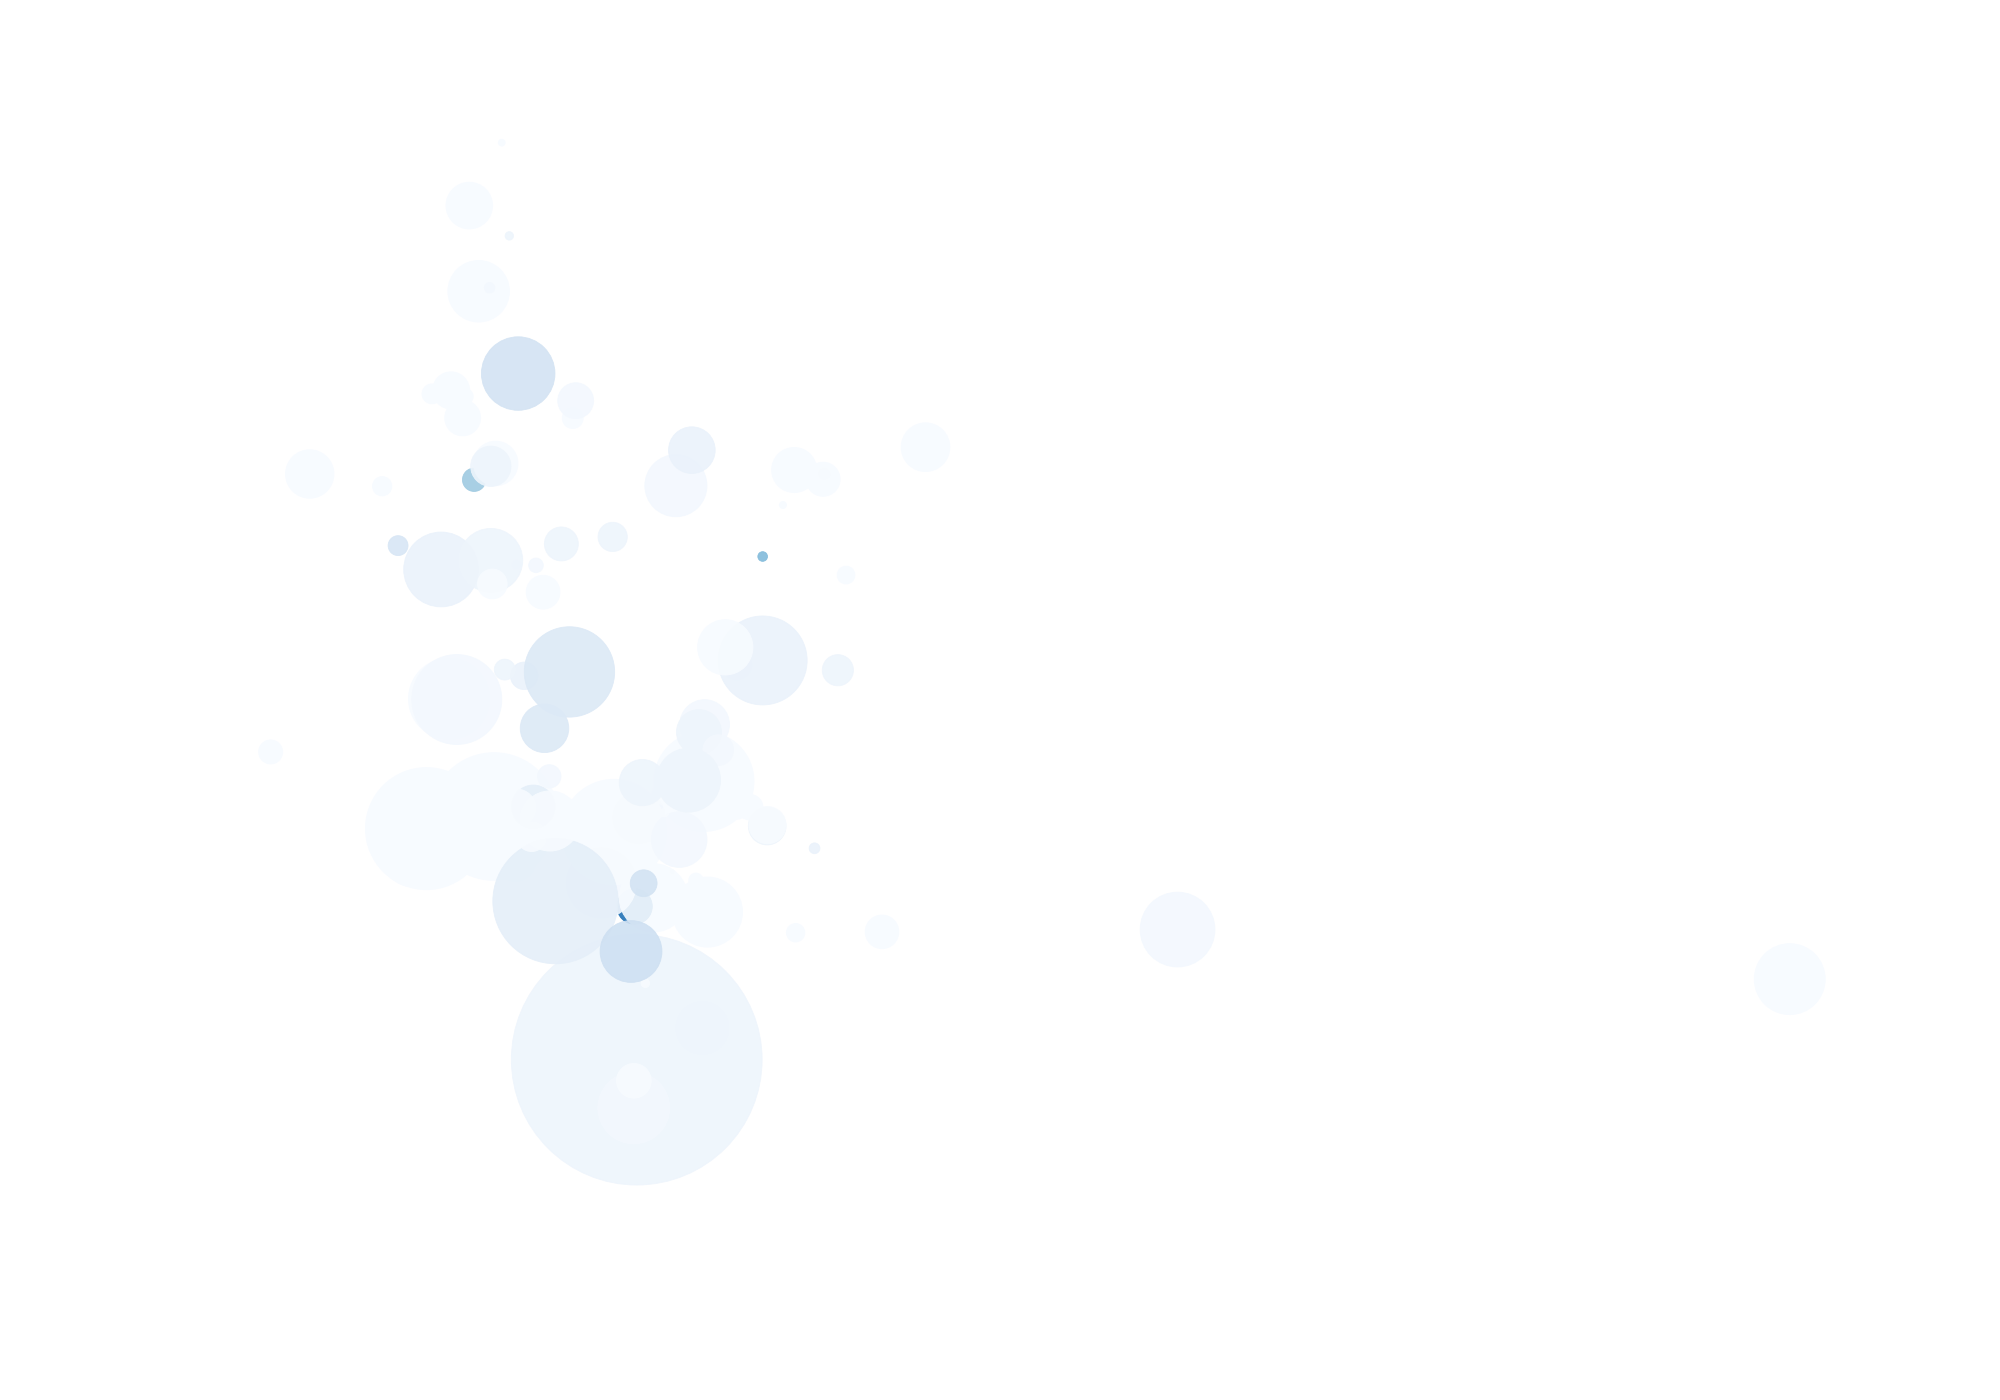

In [281]:
plt.figure(figsize=(10,7))

# node_color = [main_large.degree(v) for v in main_large]
# node_size = [0.0005*nx.get_node_attributes(main_large, 'comment_karma')[v] for v in G]
# edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(main_large, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.9, with_labels=False, 
                 width=edge_width, edge_color='1', cmap=plt.cm.Blues)
#Colormap for mapping intensities of nodes

plt.axis('off')
plt.tight_layout();

In [369]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''

    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        node_size = [0.005*nx.get_node_attributes(G, 'comment_karma')[v] for v in G]
        weights = [int(G[u][v][weight_name]) * 0.5 for u,v in edges]
        node_color = [G.degree(v) for v in G]
        labels = nx.get_edge_attributes(G,weight_name)
#         nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights, node_size=node_size,
                         with_labels= False, alpha=0.4, node_color='blue');
    else:
        nx.draw_networkx(G, pos, edges=edges);

<IPython.core.display.Javascript object>


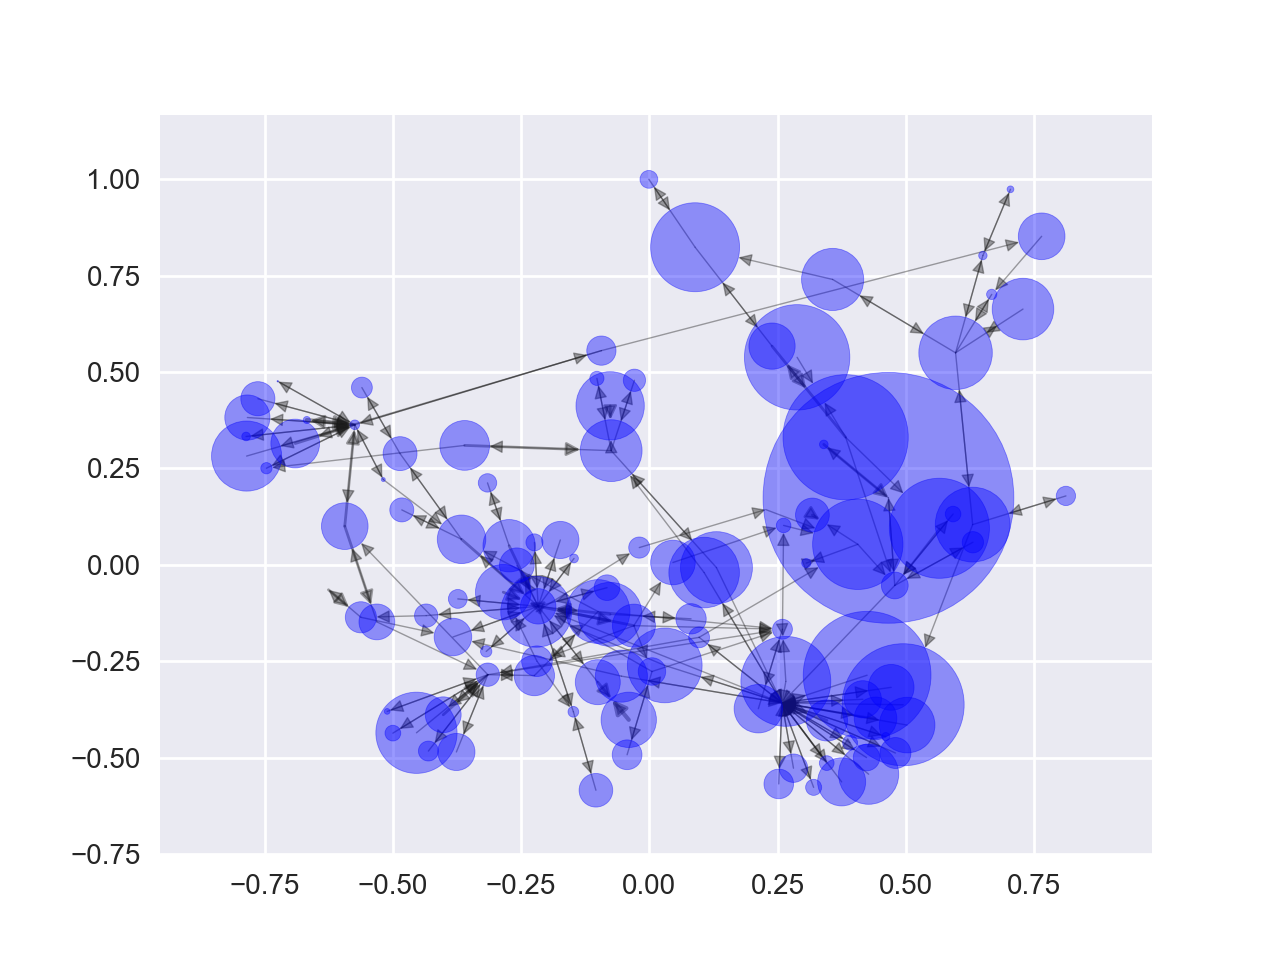

In [370]:
plot_graph(main_large, weight_name='weight')

<IPython.core.display.Javascript object>


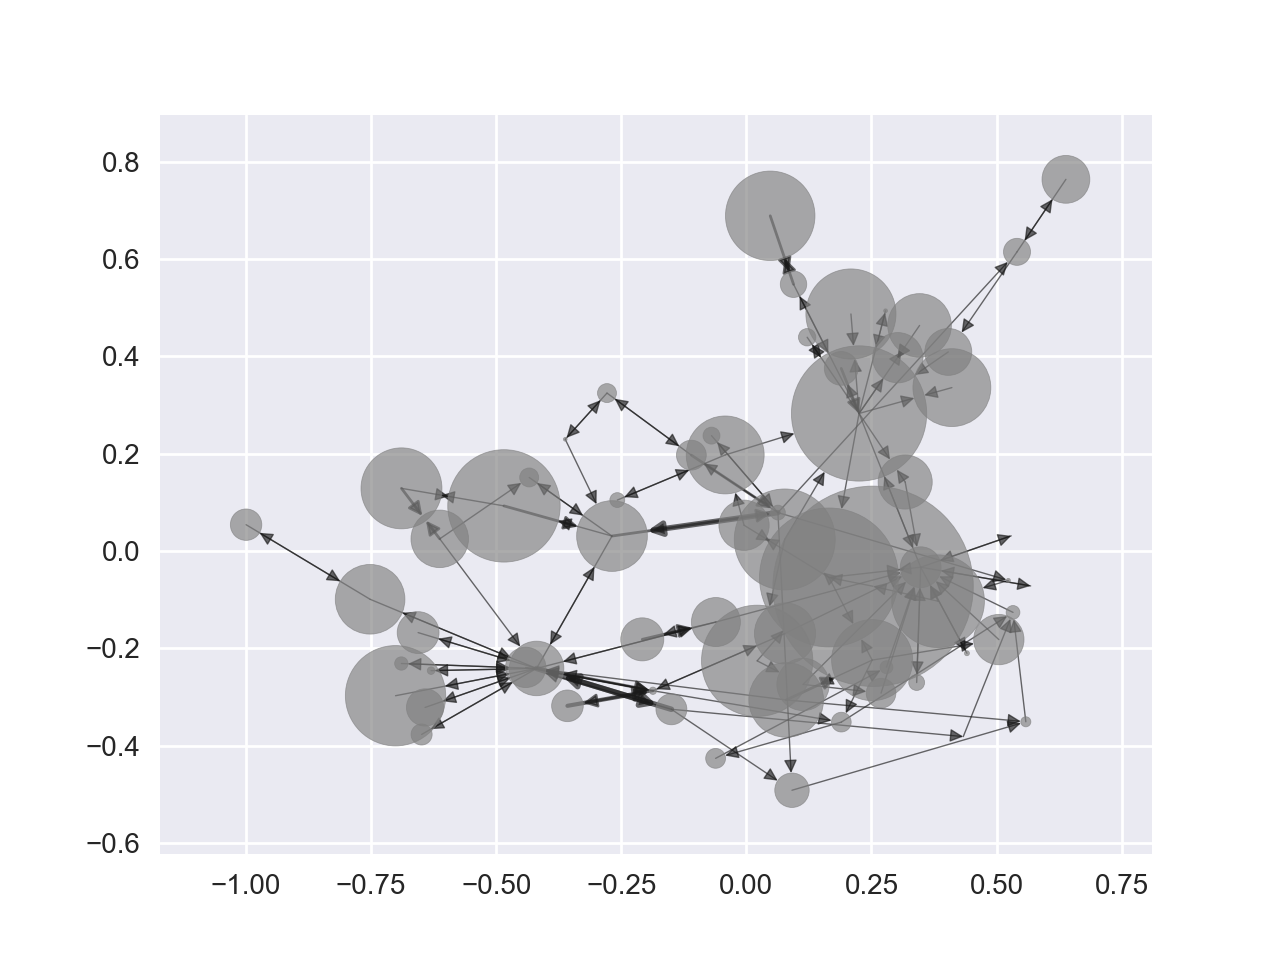

/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/weiweizheng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:636: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


In [338]:
plot_graph(main_large, weight_name='weight')

<IPython.core.display.Javascript object>


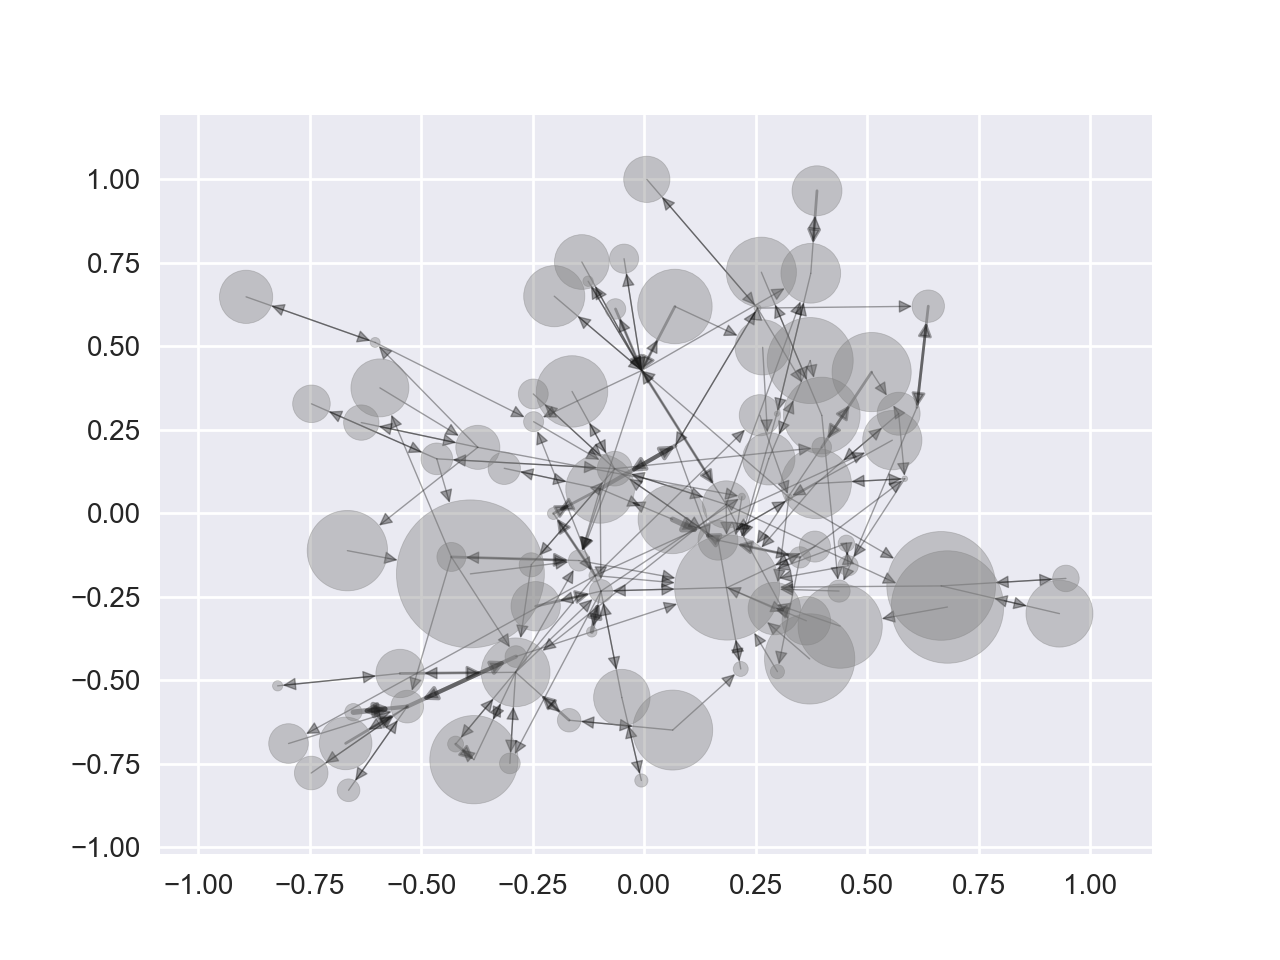

In [355]:
plot_graph(main_large, weight_name='weight')

<IPython.core.display.Javascript object>


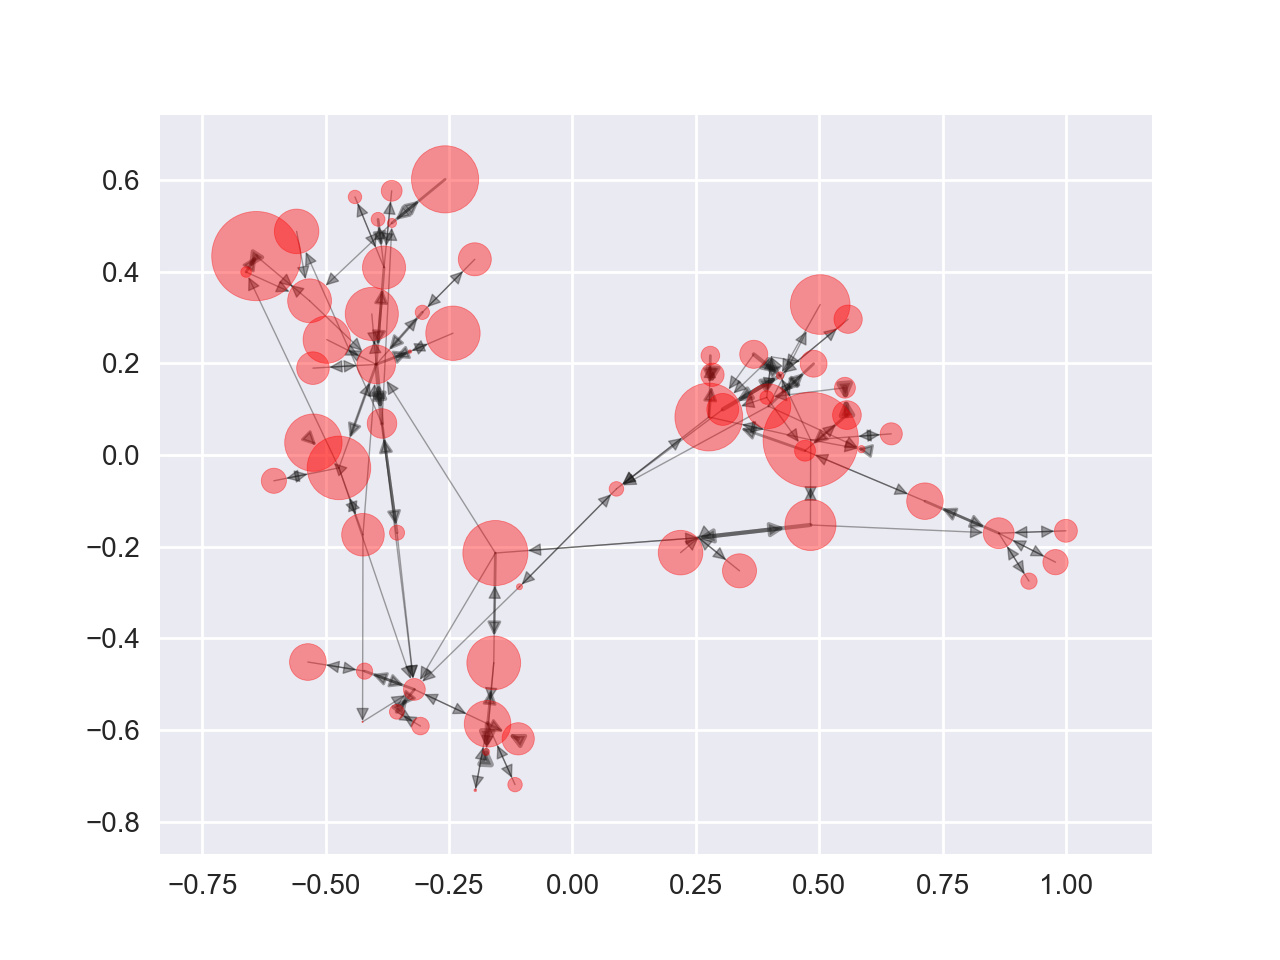

In [362]:
plot_graph(main_large, weight_name='weight')